Text(0.5, 1.0, 'Aligned Image')

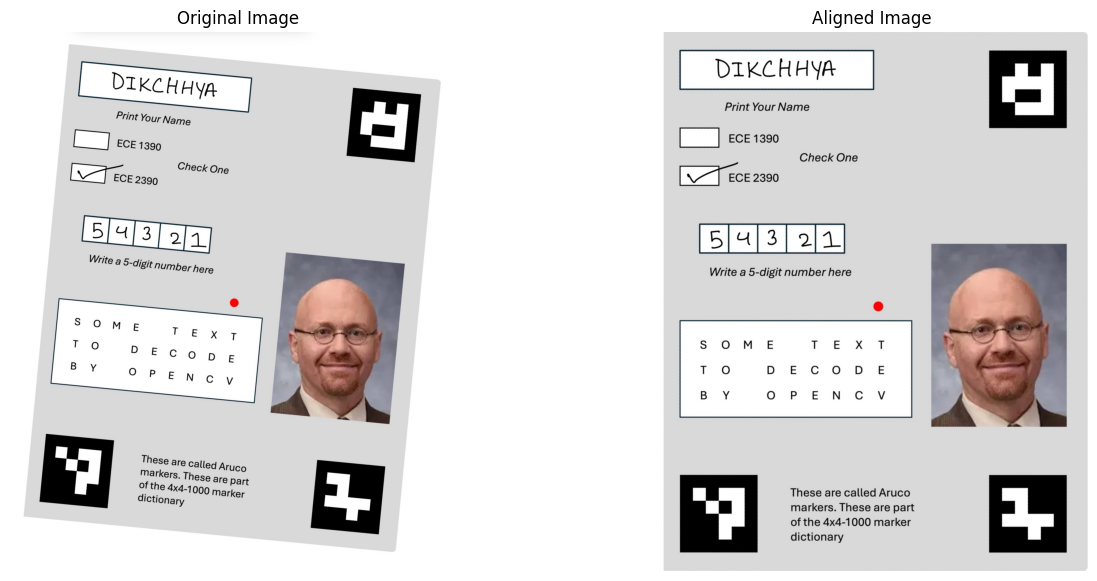

In [1]:
#Print the image (or hard copies will be given in class) and fill out the "your name", the 1390 vs 2390 checkbox, and enter a random 5 digit number
#Take a photograph of the paper
#Using the ACUCO symbols, align and orient the photograph
import cv2
import matplotlib.pyplot as plt
import cv2.aruco as aruco
import numpy as np
import easyocr  
import ssl
import easyocr

# Disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

reader = easyocr.Reader(['en'])

image = cv2.imread('hw.jpg')  
img_original = cv2.imread('Homework8.jpg')  

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)

# Define the ArUco dictionary and detect the markers
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_4X4_1000)
parameters = aruco.DetectorParameters()
detector = aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, _ = detector.detectMarkers(gray)
corners_original, ids_original, _ = detector.detectMarkers(gray_original)

if ids is None or ids_original is None:
    print("Error: Not enough ArUco markers detected.")
    exit()

# Ensure markers are detected in both images
if len(ids) < 3 or len(ids_original) < 3:
    print("Error: At least three markers are needed in both images.")
    exit()


matched_ids = []
src_pts = []
dst_pts = []

for marker_id in ids.flatten():
    if marker_id in ids_original.flatten():
        # Find the corresponding index in both images
        idx = np.where(ids.flatten() == marker_id)[0][0]
        idx_original = np.where(ids_original.flatten() == marker_id)[0][0]

        # Use the center of each marker for alignment
        src_pts.append(corners[idx][0].mean(axis=0))  # Mean of detected marker corners
        dst_pts.append(corners_original[idx_original][0].mean(axis=0))
        matched_ids.append(marker_id)

if len(src_pts) < 3:
    print("Error: At least three matching ArUco markers are required.")
    exit()

# Convert to NumPy arrays
src_pts = np.array(src_pts, dtype=np.float32)
dst_pts = np.array(dst_pts, dtype=np.float32)

# Calculate the affine transformation matrix
matrix = cv2.getAffineTransform(src_pts[:3], dst_pts[:3])

# Warp the input image
aligned_image = cv2.warpAffine(image, matrix, (img_original.shape[1], img_original.shape[0]))
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));axes[0].axis('off');axes[0].set_title('Original Image')
axes[1].imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB));axes[1].axis('off');axes[1].set_title('Aligned Image')


Detected Name: DIKCHHYA


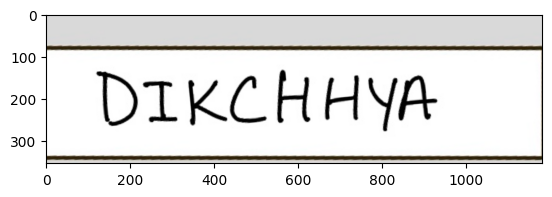

In [2]:
#Using EasyOCR, read in the name box that you wrote
import easyocr

# Convert cm to pixels based on DPI
dpi = 300
cm_to_pixels = lambda cm: int((cm / 2.54) * dpi)

def crop_region(image, x_cm, y_cm, w_cm, h_cm):

    x = cm_to_pixels(x_cm) + image.shape[1] // 2  
    y = cm_to_pixels(y_cm) + image.shape[0] // 2  
    w = cm_to_pixels(w_cm)                        
    h = cm_to_pixels(h_cm)                        
    return image[max(0, y):y+h, max(0, x):x+w]    

# Initialize the OCR reader
reader = easyocr.Reader(['en'])

# Define the coordinates for the name box
name_box = crop_region(aligned_image, -10, -15, 10, 3)  
plt.imshow(name_box)

# Perform OCR on the cropped region
name_result = reader.readtext(name_box)

# Check and print the detected name
if name_result:
    detected_name = name_result[0][1]  # Extract the text from the OCR result
    print("Detected Name:", detected_name)
else:
    print("No name detected.")

Checkbox 1390: False
Checkbox 2390: True


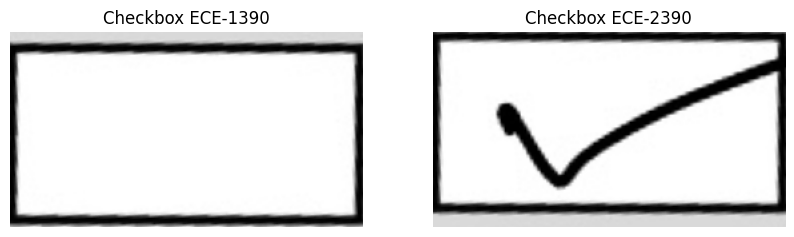

In [3]:
#Write code to check which of the two checkboxes is marked by comparing the intensity in the two boxes

def is_checkbox_marked(checkbox):
    gray = cv2.cvtColor(checkbox, cv2.COLOR_BGR2GRAY)
    return np.mean(gray) < 210

checkbox_1390 = crop_region(aligned_image, -11, -10, 2.25, 1.25)
checkbox_2390 = crop_region(aligned_image, -11, -7.75,2.25,1.25)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1);plt.imshow(checkbox_1390);plt.title('Checkbox ECE-1390');plt.axis('off') 
plt.subplot(1, 2, 2);plt.imshow(checkbox_2390);plt.title('Checkbox ECE-2390');plt.axis('off')

is_1390_marked = is_checkbox_marked(checkbox_1390)
is_2390_marked = is_checkbox_marked(checkbox_2390)

print("Checkbox 1390:", is_1390_marked)
print("Checkbox 2390:", is_2390_marked)


Decoded Digits: [5, 4, 3, 2, 1]


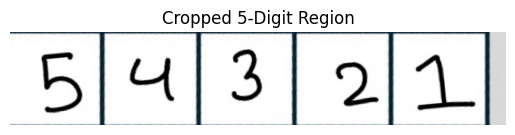

In [4]:
#Using the example from class on OCR-digits, decode the 5 numbers you wrote

dpi = 300
cm_to_pixels = lambda cm: int((cm / 2.54) * dpi)

def crop_region(image, x_cm, y_cm, w_cm, h_cm):
    
    x_pixel = cm_to_pixels(x_cm) + image.shape[1] // 2
    y_pixel = cm_to_pixels(y_cm) + image.shape[0] // 2
    w_pixel = cm_to_pixels(w_cm)
    h_pixel = cm_to_pixels(h_cm)
    return image[max(0, y_pixel):y_pixel + h_pixel, max(0, x_pixel):x_pixel + w_pixel]

reader = easyocr.Reader(['en'])

# Crop the entire 5-digit region for visualization
five_digits = crop_region(aligned_image, -9.8, -4.4, 8.5, 1.6)

# Crop each individual digit
digit1 = crop_region(aligned_image, -9.8, -4.4, 1.5, 1.6)
digit2 = crop_region(aligned_image, -8.3, -4.4, 1.5, 1.6)
digit3 = crop_region(aligned_image, -6.6, -4.4, 1.5, 1.6)
digit4 = crop_region(aligned_image, -5, -4.4, 1.5, 1.6)
digit5 = crop_region(aligned_image, -3.3, -4.4, 1.5, 1.6)

# Visualize the cropped 5-digit region
plt.imshow(cv2.cvtColor(five_digits, cv2.COLOR_BGR2RGB));plt.title("Cropped 5-Digit Region");plt.axis('off')

data = [digit1, digit2, digit3, digit4, digit5]

# Decode each digit
digits = []
for i in range(5):
   
    result = reader.readtext(data[i])
    if result:
        try:
            digits.append(int(result[0][1]))  # Extract and convert to integer
        except ValueError:
            digits.append("?")  # Append '?' for unrecognized characters
    else:
        digits.append("?")  

print("Decoded Digits:", digits)

Extracted Text:
Ss O M E T E X T
T O D FE C O D _ E
B Y O P EN C V



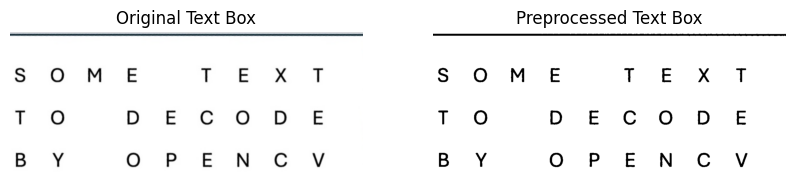

In [5]:
#Using Tesseract-OCR, read the printed text box ("some test to decode by openCV')
import pytesseract

dpi = 300
cm_to_pixels = lambda cm: int((cm / 2.54) * dpi)

def crop_region(image, x_cm, y_cm, w_cm, h_cm):
    x_pixel = cm_to_pixels(x_cm) + image.shape[1] // 2
    y_pixel = cm_to_pixels(y_cm) + image.shape[0] // 2
    w_pixel = cm_to_pixels(w_cm)
    h_pixel = cm_to_pixels(h_cm)
    return image[max(0, y_pixel):y_pixel + h_pixel, max(0, x_pixel):x_pixel + w_pixel]

# Crop the printed text box region
text_box = crop_region(aligned_image, -10, 1, 12, 5)  

# Preprocess the cropped region
gray_text_box = cv2.cvtColor(text_box, cv2.COLOR_BGR2GRAY)
_, binary_text_box = cv2.threshold(gray_text_box, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1);plt.imshow(cv2.cvtColor(text_box, cv2.COLOR_BGR2RGB));plt.title("Original Text Box");plt.axis('off')
plt.subplot(1, 2, 2);plt.imshow(binary_text_box, cmap='gray');plt.title("Preprocessed Text Box");plt.axis('off')

# Perform OCR using Tesseract
custom_config = r'--psm 6'  
extracted_text = pytesseract.image_to_string(binary_text_box, config=custom_config)

print("Extracted Text:")
print(extracted_text)


I0000 00:00:1733349273.422774  932498 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1733349273.431681  932920 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


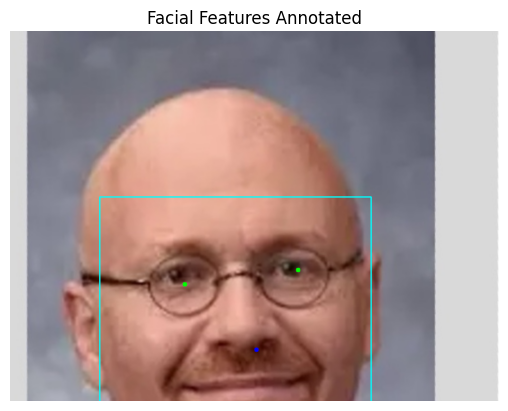

In [6]:
#ECE2390 students 7) Using MediaPipe, find the facial features for the image of Dr Huppert and draw the markers on the image.
import cv2
import mediapipe as mp

def cm_to_pixels(cm, dpi=300):
   
    return int((cm / 2.54) * dpi)

def extract_face_region(image, region):

    x_cm, y_cm, w_cm, h_cm = region
    x_px = cm_to_pixels(x_cm) + image.shape[1] // 2
    y_px = cm_to_pixels(y_cm) + image.shape[0] // 2
    w_px = cm_to_pixels(w_cm)
    h_px = cm_to_pixels(h_cm)

    # Ensure the region doesn't go out of bounds
    x_start = max(0, x_px)
    x_end = min(image.shape[1], x_start + w_px)
    y_start = max(0, y_px)
    y_end = min(image.shape[0], y_start + h_px)

    return image[y_start:y_end, x_start:x_end]

def detect_facial_features(image, region):
   
    # Extract the face region
    face_region = extract_face_region(image, region)

    plt.imshow(cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB));plt.title("Cropped Face Region");plt.axis('off')
    
    # Initialize MediaPipe Face Detection
    face_detection = mp.solutions.face_detection.FaceDetection(
        model_selection=0, min_detection_confidence=0.6
    )

    # Convert to RGB for MediaPipe
    rgb_face = cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB)

    # Detect facial landmarks
    results = face_detection.process(rgb_face)

 
    # Annotate the detected facial features
    annotated_image = face_region.copy()
    for detection in results.detections:
        # Draw bounding box
        bbox = detection.location_data.relative_bounding_box
        x, y, w, h = (
            int(bbox.xmin * annotated_image.shape[1]),
            int(bbox.ymin * annotated_image.shape[0]),
            int(bbox.width * annotated_image.shape[1]),
            int(bbox.height * annotated_image.shape[0]),
        )
        cv2.rectangle(annotated_image, (x, y), (x + w, y + h), (255, 255, 0), 2)

        # Draw specific key points (Eyes and Nose Tip)
        key_points = detection.location_data.relative_keypoints
        for idx, color in zip([0, 1, 2], [(0, 255, 0), (0, 255, 0), (255, 0, 0)]):  # Eyes: Green, Nose: Blue
            kp_x = int(key_points[idx].x * annotated_image.shape[1])
            kp_y = int(key_points[idx].y * annotated_image.shape[0])
            cv2.circle(annotated_image, (kp_x, kp_y), 5, color, -1)

    # Visualize the annotated image
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB));plt.title("Facial Features Annotated");plt.axis('off')
    
face_region = [3, -3, 10, 7]  # X, Y, Width, Height

# Call the function to detect and display facial features
detect_facial_features(aligned_image, face_region)
